**AJJPALLY NITHISH REDDY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
df=pd.read_csv('walmart_data.csv')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


##**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [ ]:
print("\nShape of the dataset (Rows, Columns):", df.shape)


Shape of the dataset (Rows, Columns): (550068, 10)


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


## **2.Detect Null values and outliers**


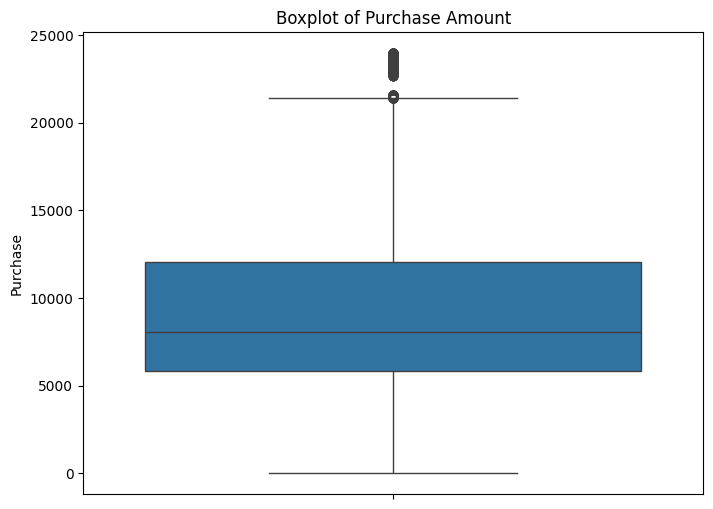

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,y='Purchase')
plt.title("Boxplot of Purchase Amount")
plt.show()

--> There are outliers above the upper whisker, meaning some customers made very high purchases. This could indicate bulk buyers or premium shoppers

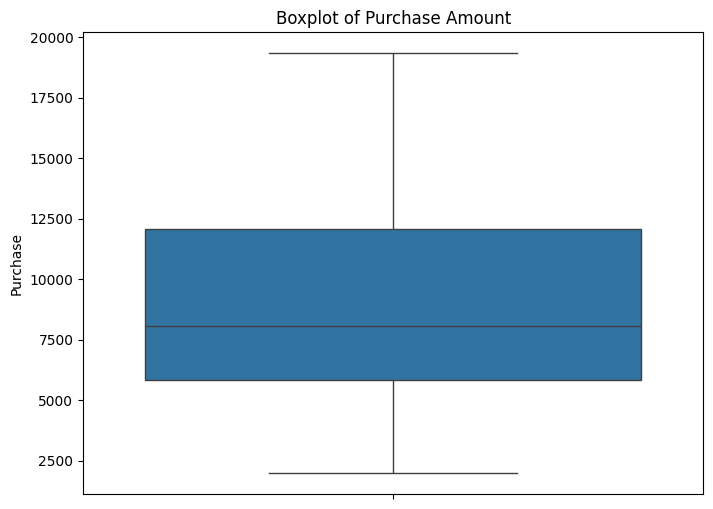

In [ ]:
lower_bound=np.percentile(df['Purchase'],5)
upper_bound=np.percentile(df["Purchase"], 95)
df['Purchase']=np.clip(df['Purchase'],lower_bound,upper_bound)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,y='Purchase')
plt.title("Boxplot of Purchase Amount")
plt.show()

-->After clipping, extreme purchase values have been adjusted, making the data more balanced. This helps in getting a clearer picture of customer spending patterns without the influence of very high purchases. The cleaned data ensures more accurate analysis and better decision-making.

##**3. Data Exploration**

**A.What products are different age groups buying?**

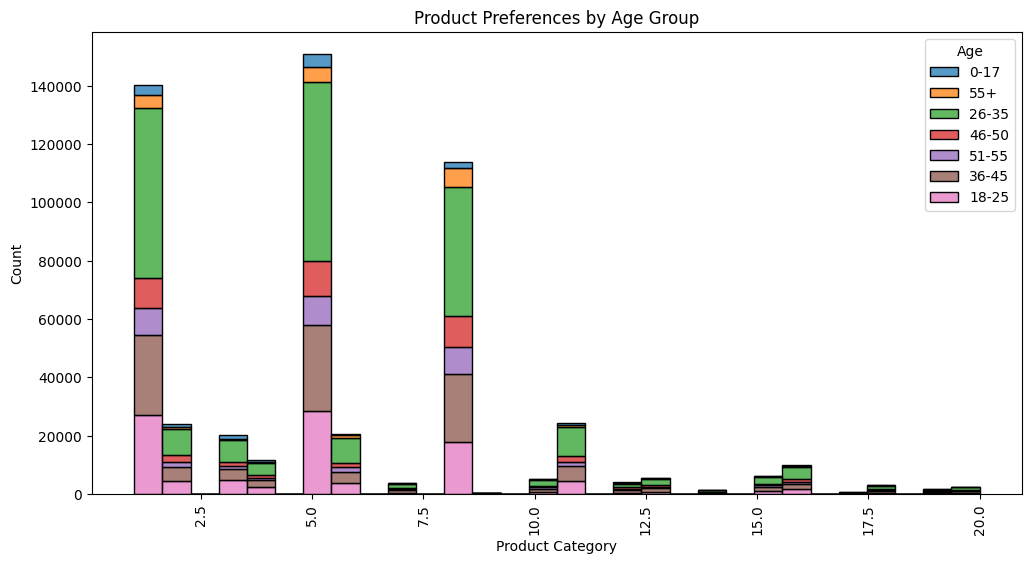

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Product_Category", hue="Age",multiple='stack',bins=30)
plt.title("Product Preferences by Age Group")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**INSIGHTS:**

The histogram indicates that the 26-35 age group dominates purchases across most product categories, followed by the 36-45 age group and then the 18-25 group. The 0-17 age group has the least representation, suggesting lower purchasing activity in this segment. This pattern highlights that individuals aged 26-35 are the most active consumers, likely due to higher purchasing power and consumer needs.

**B.Is there a relationship between age, marital status, and the amount spent?**

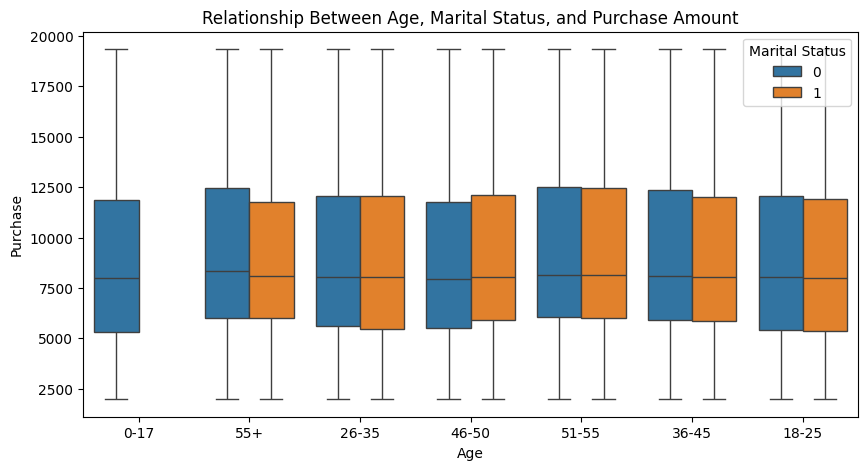

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Age", y="Purchase", hue="Marital_Status")
plt.title("Relationship Between Age, Marital Status, and Purchase Amount")
plt.legend(title="Marital Status",loc="upper right")
plt.show()

**INSIGHTS:**
The box plot shows that purchase amounts remain relatively consistent across different age groups and marital statuses. The median values are close to each other, and the interquartile ranges are similar, indicating minimal variation. Additionally, no significant outliers are present, suggesting stable purchasing behavior across these categories. This indicates that factors other than age and marital status, such as income levels or marketing strategies, may have a greater influence on purchasing patterns.

**C.Are there preferred product categories for different genders?**

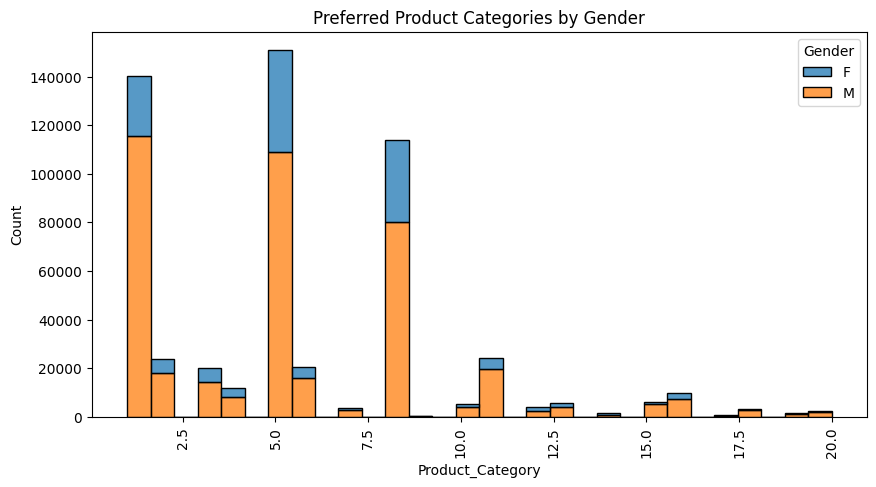

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Product_Category", hue="Gender",multiple="stack", bins=30)
plt.title("Preferred Product Categories by Gender")
plt.xticks(rotation=90)
plt.show()

**INSIGHTS:**         
The histogram shows that in almost every product category, males make up the majority of purchases, accounting for about 80-90% of the lower portion of each bar, while females contribute to the upper portion. This suggests that males have a higher purchasing frequency across most categories, while female purchases, though present, are relatively lower in comparison.

##**4. How does gender affect the amount spent?**

In [ ]:
import scipy.stats as stats
def compute_ci(data):
    mean_spent = np.mean(data)
    std_spent = np.std(data, ddof=1)
    n = len(data)
    margin_error = 1.96 * (std_spent / np.sqrt(n))
    return int(mean_spent - margin_error), int(mean_spent + margin_error)
ci_male = compute_ci(df[df["Gender"] == "M"]["Purchase"])
ci_female = compute_ci(df[df["Gender"] == "F"]["Purchase"])

print(f"95% CI for Male Spending: {(ci_male)}")
print(f"95% CI for Female Spending: {ci_female}")


95% CI for Male Spending: (9412, 9442)
95% CI for Female Spending: (8712, 8760)


In [ ]:
def compute_clt_ci(data, sample_size):
    sample = np.random.choice(data, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    margin_of_error = 1.96 * (sample_std / np.sqrt(sample_size))

    return (int(sample_mean - margin_of_error), int(sample_mean + margin_of_error))


male_spending = df[df["Gender"] == "M"]["Purchase"].values
female_spending = df[df["Gender"] == "F"]["Purchase"].values

sample_sizes = [300, 3000, 30000]

for size in sample_sizes:
    ci_male = compute_clt_ci(male_spending, size)
    print(f"95% CI for Male Spending (n={size}): {ci_male}")

for size in sample_sizes:
    ci_female = compute_clt_ci(female_spending, size)
    print(f"95% CI for Female Spending (n={size}): {ci_female}")


95% CI for Male Spending (n=300): (8244, 9348)
95% CI for Male Spending (n=3000): (9241, 9598)
95% CI for Male Spending (n=30000): (9366, 9478)
95% CI for Female Spending (n=300): (8278, 9388)
95% CI for Female Spending (n=3000): (8620, 8955)
95% CI for Female Spending (n=30000): (8710, 8814)




**i. Is the confidence interval wider for one gender? Why?**  
Yes, the **confidence interval (CI) for male spending is wider** compared to female spending. This happens because there is more variability in male spending, meaning some men spend significantly more or less than the average. In contrast, female spending is more consistent, leading to a **narrower CI** with less uncertainty.  







**ii. How does sample size impact the confidence interval?**  
As the **sample size increases, the confidence interval becomes narrower**. This means that with a larger sample, we get a more accurate estimate of the true average spending. **Smaller samples have more variability**, which results in wider CIs.  







**iii. Do confidence intervals for different sample sizes overlap?**  
Yes, confidence intervals from smaller samples **still overlap with those from larger samples**, indicating that they capture the general trend of spending. However, the CIs from smaller samples are wider, making them less precise compared to those from larger sample sizes.  







**iv. How does sample size influence the distribution of means?**  
With **larger sample sizes, the distribution of means becomes more normal and concentrated around the true mean**. This aligns with the **Central Limit Theorem (CLT)**, which states that as the sample size increases, the sample mean distribution approaches a normal distribution, reducing uncertainty and improving accuracy.  


##**5. How does Marital_Status affect the amount spent?**

In [ ]:
def compute_ci(data, sample_size):
    sample = np.random.choice(data, size=sample_size, replace=False)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    margin_of_error = 1.96 * (std / np.sqrt(sample_size))
    return int(round(mean - margin_of_error, 2)), int(round(mean + margin_of_error, 2))


married_spending = df[df["Marital_Status"] == 0]["Purchase"].values
single_spending = df[df["Marital_Status"] == 1]["Purchase"].values


ci_married_full = compute_ci(married_spending, len(married_spending))
ci_single_full = compute_ci(single_spending, len(single_spending))

ci_married_300 = compute_ci(married_spending, 300)
ci_married_3000 = compute_ci(married_spending, 3000)
ci_married_30000 = compute_ci(married_spending, 30000)

ci_single_300 = compute_ci(single_spending, 300)
ci_single_3000 = compute_ci(single_spending, 3000)
ci_single_30000 = compute_ci(single_spending, 30000)


print("95% CI for Married Spending (Full Data):", ci_married_full)
print("95% CI for Single Spending (Full Data):", ci_single_full)

print("95% CI for Married Spending (n=300):", ci_married_300)
print("95% CI for Married Spending (n=3000):", ci_married_3000)
print("95% CI for Married Spending (n=30000):", ci_married_30000)

print("95% CI for Single Spending (n=300):", ci_single_300)
print("95% CI for Single Spending (n=3000):", ci_single_3000)
print("95% CI for Single Spending (n=30000):", ci_single_30000)


95% CI for Married Spending (Full Data): (9242, 9275)
95% CI for Single Spending (Full Data): (9233, 9273)
95% CI for Married Spending (n=300): (8567, 9639)
95% CI for Married Spending (n=3000): (9062, 9400)
95% CI for Married Spending (n=30000): (9215, 9326)
95% CI for Single Spending (n=300): (8707, 9859)
95% CI for Single Spending (n=3000): (9099, 9453)
95% CI for Single Spending (n=30000): (9202, 9312)


i. **Is the confidence interval wider for one marital status? Why?**  
Yes, the confidence interval for single individuals is slightly wider than for married individuals. This suggests that spending among single individuals is more variable, leading to greater uncertainty in the estimate. Married individuals likely have more consistent spending patterns, which results in a narrower confidence interval.  




ii. **How is the width of the confidence interval affected by the sample size?**  
As the sample size increases, the confidence interval becomes narrower. Larger samples provide a more precise estimate of the population mean by reducing variability, while smaller samples have more fluctuations, leading to wider confidence intervals.  




iii. **Do the confidence intervals for different sample sizes overlap?**  
Yes, the confidence intervals for different sample sizes do overlap, indicating that the estimated mean spending remains within a similar range regardless of the sample size. However, smaller sample sizes have wider confidence intervals, reflecting greater uncertainty in the estimate.  




iv. **How does the sample size affect the shape of the distributions of the means?**  
As the sample size increases, the distribution of sample means becomes more normal and centered around the true mean. This follows the Central Limit Theorem (CLT), which states that with a sufficiently large sample size, the distribution of sample means approaches a normal distribution, leading to more reliable and accurate estimates.

##**6. How does Age affect the amount spent?**

In [ ]:


def compute_ci(data, sample_size):
    sample = np.random.choice(data, size=sample_size, replace=False)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    margin_of_error = 1.96 * (std / np.sqrt(sample_size))
    return int(round(mean - margin_of_error, 2)), int(round(mean + margin_of_error, 2))



age_0_1 = df[df["Age"] == "0-1"]["Purchase"].values
age_18_25 = df[df["Age"] == "18-25"]["Purchase"].values
age_26_35 = df[df["Age"] == "26-35"]["Purchase"].values
age_36_45 = df[df["Age"] == "36-45"]["Purchase"].values
age_46_50 = df[df["Age"] == "46-50"]["Purchase"].values
age_51_55 = df[df["Age"] == "51-55"]["Purchase"].values
age_55_plus = df[df["Age"] == "55+"]["Purchase"].values

age_groups = {
    "0-1": age_0_1,
    "18-25": age_18_25,
    "26-35": age_26_35,
    "36-45": age_36_45,
    "46-50": age_46_50,
    "51-55": age_51_55,
    "55+": age_55_plus
}

for age_group, data in age_groups.items():
    if len(data) < 300:
        print(f"Not enough data for {age_group} age group")
        continue

    ci_full = compute_ci(data, len(data))
    ci_300 = compute_ci(data, 300)
    ci_3000 = compute_ci(data, 3000) if len(data) >= 3000 else "Not enough data"
    ci_30000 = compute_ci(data, 30000) if len(data) >= 30000 else "Not enough data"

    print(f"95% CI for Age {age_group} Spending (Full Data):", ci_full)
    print(f"95% CI for Age {age_group} Spending (n=300):", ci_300)
    print(f"95% CI for Age {age_group} Spending (n=3000):", ci_3000)
    print(f"95% CI for Age {age_group} Spending (n=30000):", ci_30000)
    print()


Not enough data for 0-1 age group
95% CI for Age 18-25 Spending (Full Data): (9138, 9199)
95% CI for Age 18-25 Spending (n=300): (8912, 10035)
95% CI for Age 18-25 Spending (n=3000): (9113, 9466)
95% CI for Age 18-25 Spending (n=30000): (9123, 9234)

95% CI for Age 26-35 Spending (Full Data): (9223, 9264)
95% CI for Age 26-35 Spending (n=300): (8653, 9807)
95% CI for Age 26-35 Spending (n=3000): (9239, 9590)
95% CI for Age 26-35 Spending (n=30000): (9142, 9251)

95% CI for Age 36-45 Spending (Full Data): (9294, 9351)
95% CI for Age 36-45 Spending (n=300): (9040, 10166)
95% CI for Age 36-45 Spending (n=3000): (9150, 9494)
95% CI for Age 36-45 Spending (n=30000): (9305, 9415)

95% CI for Age 46-50 Spending (Full Data): (9160, 9248)
95% CI for Age 46-50 Spending (n=300): (8856, 9957)
95% CI for Age 46-50 Spending (n=3000): (9109, 9451)
95% CI for Age 46-50 Spending (n=30000): (9169, 9277)

95% CI for Age 51-55 Spending (Full Data): (9466, 9563)
95% CI for Age 51-55 Spending (n=300): (8796

**i. Is the confidence interval computed using the entire dataset wider for age groups? Why is this the case?**  

No, the confidence interval for the entire dataset is narrower because it includes all available data, making the estimate more accurate. Smaller samples have more uncertainty, which makes their confidence intervals wider.  



**ii. How is the width of the confidence interval affected by the sample size?**  

As the sample size increases, the confidence interval becomes narrower. This happens because larger samples give a better estimate of the actual population average, reducing uncertainty. Smaller samples have more variation, leading to wider intervals.  



**iii. Do the confidence intervals for different sample sizes overlap?**  

Yes, confidence intervals for different sample sizes do overlap, but smaller samples tend to have more variation, making their confidence intervals wider and less precise. Larger sample sizes have more stable confidence intervals, which are closer to the actual population values.  



**iv. How does the sample size affect the shape of the distributions of the means?**  

With a small sample size, the distribution of sample means can be uneven or skewed. But as the sample size increases, the distribution becomes more normal and smooth due to the Central Limit Theorem (CLT). This means larger samples give more reliable and consistent estimates.

##**7. Create a report**



**Report on Confidence Intervals and Consumer Spending Insights for Walmart**  

**a. Gender-Based Spending:**  
By analyzing confidence intervals for male and female spending, we can determine if their average spending significantly differs. If the confidence intervals overlap, it suggests similar spending behavior, meaning Walmart’s marketing strategies can remain uniform across genders. However, if they do not overlap, Walmart can introduce gender-specific promotions, discounts, and product recommendations to maximize sales and customer engagement.  

**b. Marital Status and Spending:**  
Examining the confidence intervals for married and unmarried customers helps assess if their spending patterns differ. If there is no overlap, it indicates distinct purchasing behaviors, allowing Walmart to design targeted campaigns, such as family-centric promotions for married customers and personalized deals for singles. If the intervals overlap, Walmart can focus on broader marketing strategies rather than segmenting based on marital status.  

**c. Age Group Spending:**  
Analyzing confidence intervals across different age groups helps identify which demographics contribute the most to Walmart’s revenue. If spending patterns vary significantly (i.e., no overlap in confidence intervals), Walmart can tailor product selections, loyalty programs, and discounts to specific age groups. For instance, younger customers may be more inclined toward tech products, while older customers might prioritize household essentials. If the confidence intervals overlap, a more generalized approach can be adopted for promotions.


**-->By leveraging these insights, Walmart can refine pricing strategies, optimize inventory, and enhance customer experience, ultimately improving sales and profitability.**


##**8. Recommendations**

### **Recommendations Based on Walmart Data Analysis**  

 **Customer Segmentation & Targeted Marketing**  
  Analyzing customer demographics like age, gender, and marital status can help create personalized marketing strategies. Offering family discounts for married customers and exclusive membership benefits for singles can boost engagement.  

 **Spending Patterns & Product Preferences**  
  Understanding customer spending behavior and preferences can help in optimizing inventory and pricing. Identifying peak shopping hours and seasonal trends ensures better stock management and product placement.  

 **Managing Outliers & Special Segments**  
  Detecting bulk buyers and regular shoppers allows for customized discounts and promotions. Identifying unusual purchase patterns can help prevent stock shortages and supply chain disruptions.  

 **Forecasting & Inventory Management**  
  Predictive analytics can improve demand forecasting, reducing the risks of overstocking or stockouts. Implementing real-time data tracking helps maintain optimal inventory levels, minimizing waste and improving efficiency.  

 **Business Growth & Customer Engagement**  
  Using AI-driven insights can optimize decision-making, enhance supply chain efficiency, and personalize customer experiences. Focused marketing and operational improvements can drive revenue growth and ensure long-term sustainability.  

**-->By implementing these strategies, Walmart can achieve higher customer satisfaction, improved sales, and enhanced operational efficiency.**